# Kiva Repayment Analysis
## by Christopher James

## Preliminary Wrangling

This dataset contains statistics about borrowers from the microfinance charity Kiva. Wrangling was done on the notebook
'kiva_repayment_wrangle.ipynb'. More information can be found in the file 'kiva_repayment_wrangle.ipynb'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Any needed functions


# Function to generate a random sample of df rows.
def df_sample(dataframe, samp_size):
    samples = np.random.choice(dataframe.shape[0], samp_size, replace = False)
    return dataframe.loc[samples,:]

In [3]:
# Read csv file into dataframe.
df = pd.read_csv('kiva_loans_master.csv')

In [7]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,To repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"user_favorite, user_favorite","female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,To purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,"user_favorite, user_favorite",female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,To purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 671203 non-null  object 
 6   country_code        671205 non-null  object 
 7   country             671205 non-null  object 
 8   region              670238 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          671158 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      671205 non-null  object 
 13  funded_time         668863 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

### What is the structure of your dataset?

This dataset consists of 671,205 rows and 20 columns. Those columns are 'id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 'term_in_months', 'lender_count', 'tags', 'borrower_genders', 'repayment_interval', and 'date'.

### What is/are the main feature(s) of interest in your dataset?

I am looking to discover what features have an affect on the repayment interval type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe loan amount, sector, country, and length of loan will have affects on repayment interval type.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Distribution of Loans by Country (Min. 500)

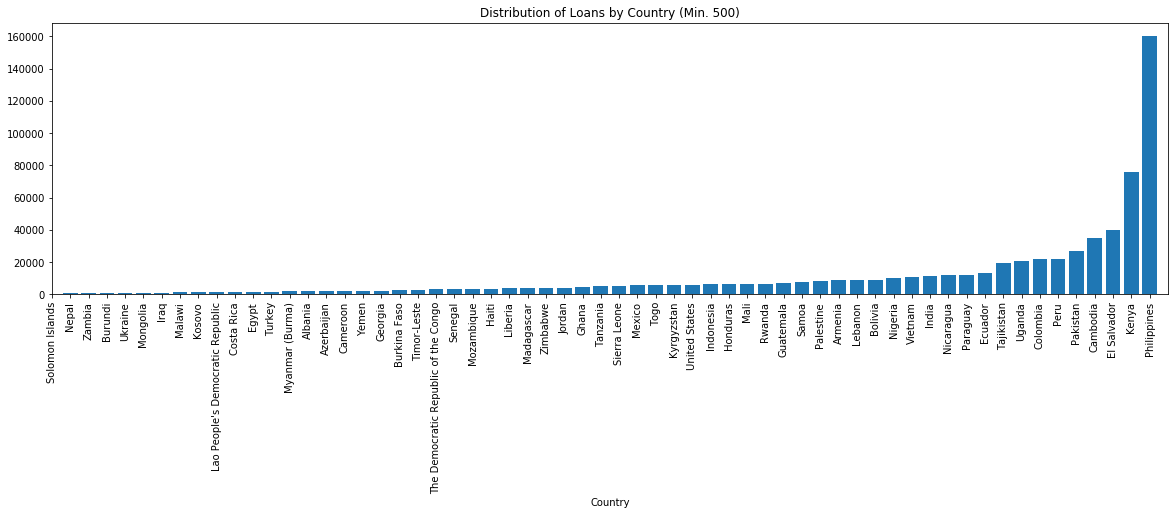

In [12]:
# Distribution of loans by country (min. 500)
plt.figure(figsize = [20, 5])
country_count = df.groupby('country')['id'].count().sort_values()
height = country_count
labels = country_count.index.tolist()
position = np.arange(1, 87+1, 1)

plt.bar(position, height)
plt.title('Distribution of Loans by Country (Min. 500)')
plt.xlabel('Country')
plt.xticks(position, labels, rotation = 90)
plt.xlim(left = 27, right = 87+1);

One thing that stands out with the distribution of loans by country is the geographic diversity. The top 5 countries are the Phillipines, Kenya, El Salvador, Cambodia, and Pakistan. These countries exist on 3 different continents.

### Disrtibution of Loan Amounts

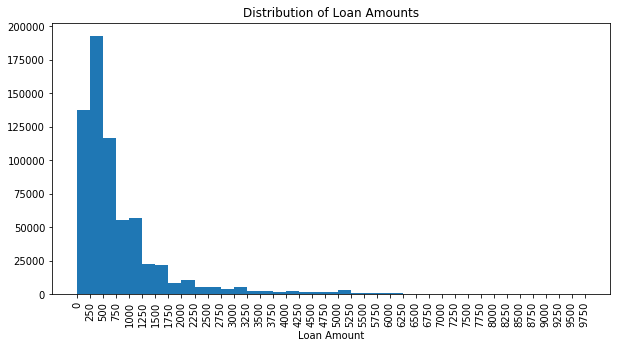

In [14]:
plt.figure(figsize = [10, 5])
bins = np.arange(0, 10000, 250)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'loan_amount', bins = bins)
plt.xticks(ticks, labels, rotation = 90)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount');

The majority of the loans are less than 750 dollars, peaking between 250 and 500 dollars. Since these loans are meant for people in some of the poorest parts of the world, this is not surprising. These money amounts can go a long way.

### Distribution of Loans by Sector

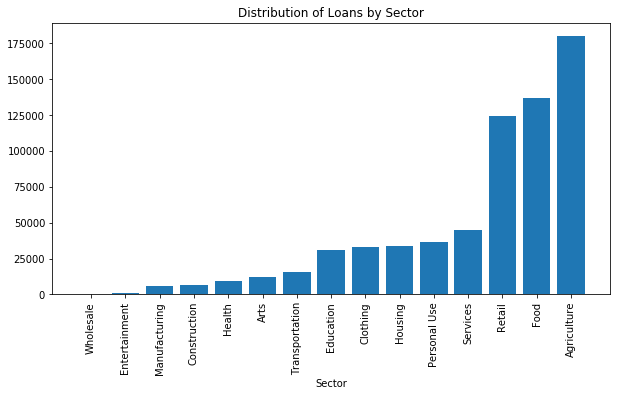

In [18]:
# Distribution of loans by country (min. 500)
plt.figure(figsize = [10, 5])
sector_count = df.groupby('sector')['id'].count().sort_values()
height = sector_count
labels = sector_count.index.tolist()
position = np.arange(1, 15+1, 1)

plt.bar(position, height)
plt.title('Distribution of Loans by Sector')
plt.xlabel('Sector')
plt.xticks(position, labels, rotation = 90);

The two most populat loans by sector are the production of food (agriculture) and the consumption of food. This makes sense, as poorer countries rely on these industries for economic and job growth, nuch like developed nations did before the industrial revolution.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!